# Extract Features from NLP

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

with open('df1.data','rb') as data:
    df = pickle.load(data)

**Get frequencies**

In [3]:
def get_frequencies(bag_words):
    '''
    This function gets a dictionary of frequencies for all the descriptions
    Input:
        bag_words: List of lists of words
    Output:
        freq_dict: a dictionary of the word and its frquency of all
    '''
    # Initialize local variables
    freq_dict = {}
    # Iterate over every row
    for description in bag_words:
        # Iterate over every word in the row
        for word in description:
            # Add one if the word is present 0 if it is not
            freq_dict[word] = freq_dict.get(word,0)+1
            
    return freq_dict

In [13]:
df['Descripción del Anuncio'].values

array([list([&#39;mejor&#39;, &#39;iluminacion&#39;, &#39;iglesi&#39;, &#39;san&#39;, &#39;miguel&#39;]),
       list([&#39;adquisicion&#39;, &#39;uniform&#39;, &#39;direccion&#39;, &#39;segur&#39;, &#39;public&#39;, &#39;transit&#39;]),
       list([&#39;proyect&#39;, &#39;ejecut&#39;, &#39;jardin&#39;, &#39;vecinal&#39;, &#39;coloni&#39;, &#39;amer&#39;, &#39;ciud&#39;, &#39;salamanc&#39;, &#39;gto&#39;]),
       ...,
       list([&#39;construccion&#39;, &#39;&#39;, &#39;aul&#39;, &#39;didact&#39;, &#39;obra&#39;, &#39;exterior&#39;, &#39;victorin&#39;, &#39;trinid&#39;, &#39;vazquez&#39;, &#39;local&#39;, &#39;ocosing&#39;, &#39;municipi&#39;, &#39;ocosing&#39;, &#39;chiap&#39;]),
       list([&#39;adquisicion&#39;, &#39;muebl&#39;, &#39;mader&#39;]),
       list([&#39;reparacion&#39;, &#39;integral&#39;, &#39;mecan&#39;, &#39;apertur&#39;, &#39;puert&#39;, &#39;maquin&#39;, &#39;secador&#39;, &#39;rop&#39;, &#39;tip&#39;, &#39;tombol&#39;, &#39;&#39;, &#39;&#39;, &#39;&#39;, &#39;p

In [4]:
# Get the frequencies and save it in a dictionary
freq_dict = get_frequencies(df['Descripción del Anuncio'].values)

In [12]:
sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)

[(&#39;&#39;, 65752),
 (&#39;servici&#39;, 29804),
 (&#39;adquisicion&#39;, 12293),
 (&#39;material&#39;, 11428),
 (&#39;profesional&#39;, 7045),
 (&#39;aagyr&#39;, 6910),
 (&#39;manten&#39;, 6794),
 (&#39;program&#39;, 5952),
 (&#39;suministr&#39;, 5748),
 (&#39;km&#39;, 5694),
 (&#39;equip&#39;, 5687),
 (&#39;medicament&#39;, 5364),
 (&#39;curacion&#39;, 5203),
 (&#39;apoy&#39;, 5097),
 (&#39;municipi&#39;, 4944),
 (&#39;medic&#39;, 4593),
 (&#39;elaboracion&#39;, 4583),
 (&#39;public&#39;, 4200),
 (&#39;desarroll&#39;, 4155),
 (&#39;integral&#39;, 4155),
 (&#39;nacional&#39;, 4124),
 (&#39;rural&#39;, 3890),
 (&#39;trabaj&#39;, 3827),
 (&#39;establec&#39;, 3791),
 (&#39;general&#39;, 3498),
 (&#39;contratacion&#39;, 3316),
 (&#39;sistem&#39;, 3306),
 (&#39;tecnic&#39;, 3284),
 (&#39;proyect&#39;, 3275),
 (&#39;laboratori&#39;, 3099),
 (&#39;construccion&#39;, 3057),
 (&#39;direccion&#39;, 2985),
 (&#39;part&#39;, 2963),
 (&#39;control&#39;, 2861),
 (&#39;agu&#39;, 2717),
 (&#39;cent

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
def plot_freq(freq_dict):
    '''
    This function plots the top 10 most used words
    '''
    # Sort the dictionary by value to plot
    freq_dict_ = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Unzip the dictionary to get the names and frequencies separated from the sorted list
    x, y = zip(*freq_dict_[:10])
    # plot
    sns.barplot(np.arange(len(x)), y)
    plt.xticks(np.arange(len(x)), x, rotation=90) 
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()

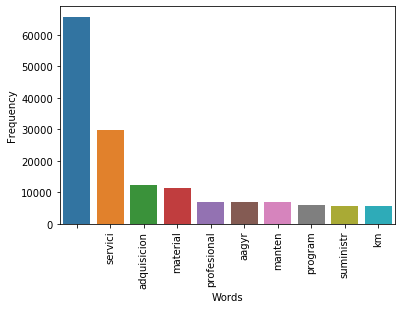

In [6]:
plot_freq(freq_dict)

In [7]:
def word_in_bag(word, bag):
    '''
    Return the evaluation if the word is contained in the bag (1) or not (0).
    '''
    if word in bag:
        return 1
    else:
        return 0

In [8]:
def most_freq_words(freq_dict, data, n):
    '''
    This function creates the n most used words of the total corpus
    Input:
        freq_dict: the frequency bag of words for all the corpus
        data: the column to evaluate
        n: parameter of n most used words
    '''
    # Sort the dictionary by value of each key
    freq_dict_ = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    # Obtain the first n most used words
    most_used_words, _ = zip(*freq_dict_[:n])
    # Iterate over each most used word
    for word in most_used_words:
        # Apply the evaluation word_in_bag to get if the word is contained in the corpus of each row
        data['word_'+word] = data.apply(lambda row: word_in_bag(word,row['Descripción del Anuncio']),axis=1)

    return data

In [9]:
# Get the most frequent words into binarized columns
df = most_freq_words(freq_dict, df, 3)

**Drop columns that do not add information**

In [10]:
df = df.drop(['Descripción del Anuncio'], axis=1)

KeyError: &quot;[&#39;Dirección del anuncio&#39;] not found in axis&quot;

Split date column

In [11]:
import re

def split_date(string):
    '''
    The function split the date strings into separeted columns with split characters of '-',' ', and ':'.
    Input:
        string: the date string
    Output:
        a list with the separeted string as integers
    '''

    return [int(string_) for string_ in re.split('-|\ |\:', string)]

In [12]:
def transform_date_columns(data):
    '''
    This function transforms a date string (AAAA-MM-DD HH:mm) to separate columns
    Input:
        data: 2D array of values to split.
    Output:
        date_divided: 2D array with the elements vectorized into separate elements
    '''
    # Check if column is type date is string
    if data.dtype == 'O':
        # Split the string for each list of strings
        date_divided = [split_date(string) for string in data]

    return date_divided

In [13]:
# Get the date divided and add it to the original dataframe
df = pd.concat([ df.drop('Publicación del anuncio',axis=1), pd.DataFrame(transform_date_columns(df['Publicación del anuncio'].values),columns=['Año_pub','Mes_pub','Dia_pub','Hora_pub','Min_pub'])], axis=1)
df

,Carácter del procedimiento,Forma del procedimiento,Artículo de excepción,Plantilla del expediente,Nombre de la UC,Entidad federativa,Tipo de contratación,word_servici,word_adquisicion,word_material,Año_pub,Mes_pub,Dia_pub,Hora_pub,Min_pub
0,Nacional,Presencial,NaN,V20150817 30. Licitación Pública Nacional de O...,QROO-Cozumel-Dirección de Obras Públicas #8230...,Sur,Obra Publica,0,0,0,2020,8,10,12,49
1,Nacional,Presencial,NaN,V20150817 28. Licitación Pública Nacional de A...,QROO-Cozumel-Dirección de Obras Públicas #8230...,Sur,Adquisiciones,0,1,0,2020,8,14,11,19
2,nan,nan,Art. 43 s/f,06. Adjudicación Directa LOPSRM,GTO-Salamanca-DIRECCION GENERAL DE OBRAS PUBLI...,NaN,Servicios Relacionados con la OP,0,0,0,2020,3,20,12,35
3,Nacional,Mixta,Art. 43 s/f,V20151220 19. Invitación a cuando menos tres N...,MEX-Nicolás Romero-Direccion de Obras Publicas...,Centro,Obra Publica,0,0,0,2020,6,8,10,26
4,Nacional,Mixta,Art. 43 s/f,V20151220 19. Invitación a cuando menos tres N...,MEX-Nicolás Romero-Direccion de Obras Publicas...,Centro,Obra Publica,0,0,0,2020,6,8,10,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96117,Nacional,Mixta,Art. 42 párrafo primero,05. Adjudicación Directa LAASSP,SEMAR-Dirección General Adjunta de Adquisicion...,Centro,Adquisiciones,0,0,0,2020,8,6,13,52
96118,Nacional,Presencial,Art. 41 fr. XII,05. Adjudicación Directa LAASSP,DICONSA-Dirección de Comercialización #008VSS998,Norte,Adquisiciones,0,0,0,2020,8,6,13,43
96119,Nacional,Presencial,Art. 43 s/f,06. Adjudicación Directa LOPSRM,CHIS-Instituto de la Infraestructura Física Ed...,Pacifico Sur,Obra Publica,0,0,0,2020,8,6,13,32
96120,Nacional,Presencial,Art. 41 fr. XI,05. Adjudicación Directa LAASSP,INPI-Dirección de Adquisiciones y Obra Pública...,Centro,Adquisiciones,0,1,0,2020,8,12,13,55


In [14]:
df['Nombre de la UC'].unique()

array([&#39;QROO-Cozumel-Dirección de Obras Públicas #823001999&#39;,
       &#39;GTO-Salamanca-DIRECCION GENERAL DE OBRAS PUBLICAS #811027990&#39;,
       &#39;MEX-Nicolás Romero-Direccion de Obras Publicas #815060972&#39;, ...,
       &#39;GTO-Moroleón-SISTEMA MUNICIPAL DE AGUA POTABLE Y ALCANTARILLADO DE MOROLEÓN (SMAPAM) #811021932&#39;,
       &#39;JAL-Sistema para el Desarrollo Integral de la Familia Jalisco-Dirección de Recursos Materiales #914132999&#39;,
       &#39;DGO-Universidad Politécnica Gómez Palacio-Secretaria Administrativa #910040998&#39;],
      dtype=object)

In [15]:
# Save the object in a python file\n",
import pickle

with open('df2.data','wb') as data:
    pickle.dump(df, data)